In [99]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import os 
from tensorflow import keras
from tensorflow.keras import layers






In [101]:
width_shape = 50
height_shape = 50
batch_size = 32 

names = ['CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [102]:
test_data_dir = 'test'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)


custom_Model= load_model("modelo4.h5")





Found 805 images belonging to 7 classes.


In [103]:
predictions = custom_Model.predict(test_generator)
#predictions = custom_Model.predictions(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

2023-09-08 00:12:36.881542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 4s 154ms/step


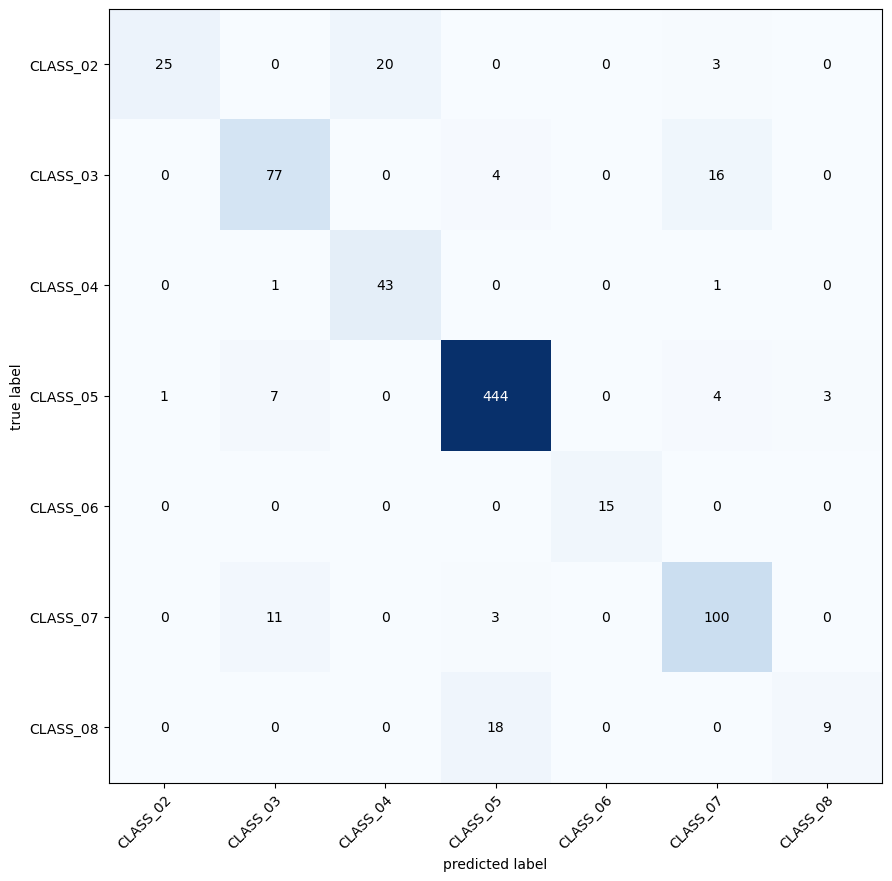

In [104]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()


In [77]:
print(metrics.classification_report(y_real,y_pred, digits = 4))


              precision    recall  f1-score   support

           0     0.8571    0.3750    0.5217        48
           1     0.8485    0.8660    0.8571        97
           2     0.6081    1.0000    0.7563        45
           3     0.9670    0.9586    0.9628       459
           4     1.0000    1.0000    1.0000        15
           5     0.8689    0.9298    0.8983       114
           6     0.7368    0.5185    0.6087        27

    accuracy                         0.8969       805
   macro avg     0.8409    0.8068    0.8007       805
weighted avg     0.9051    0.8969    0.8919       805

